### 탐색적 자료 분석  https://3months.tistory.com/325?category=753896

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


titanic = pd.read_csv("titanic.csv")

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic["Survived"] = titanic["Survived"].astype("object")
titanic["Pclass"] = titanic["Pclass"].astype("object")

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]




,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


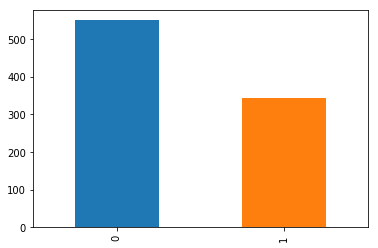

In [7]:
titanic['Survived'].value_counts().plot(kind='bar') 
plt.show()



### 명목형 변수의 분포 살펴보기
#### 단변수 탐색

In [8]:
category_feature = [ col for col in titanic.columns if titanic[col].dtypes == "object"]
category_feature




['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [11]:
category_feature = list(set(category_feature) - set(['PassengerId','Survived']))
category_feature




['Cabin', 'Sex', 'Ticket', 'Name', 'Pclass', 'Embarked']

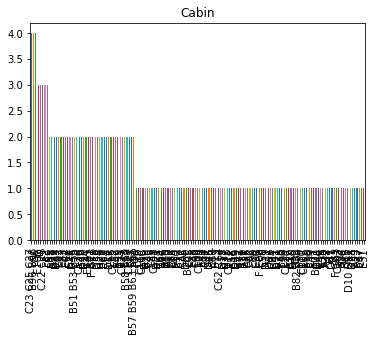

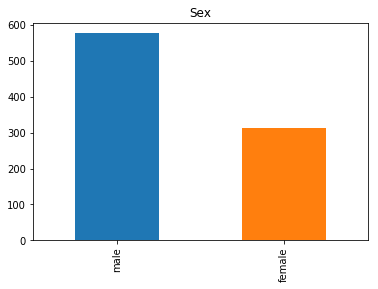

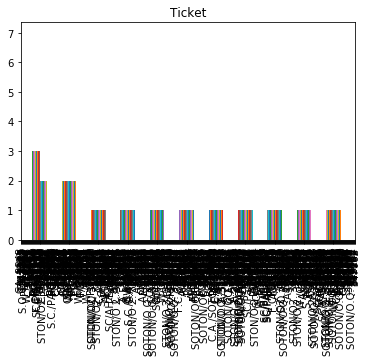

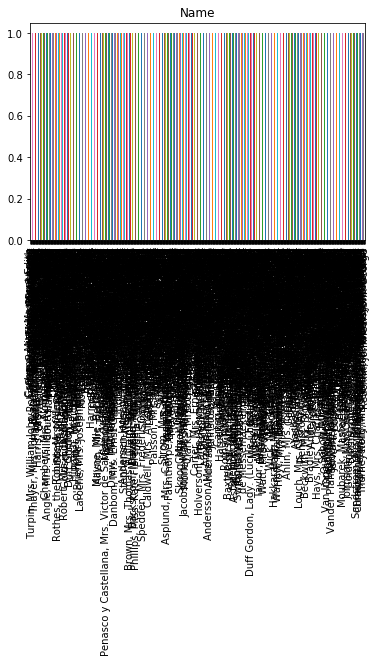

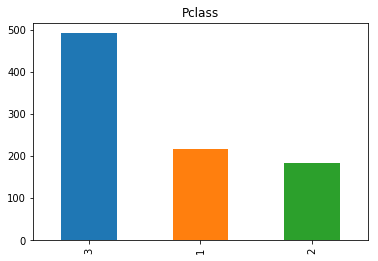

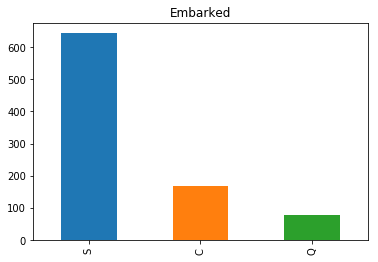

In [13]:
for col in category_feature:
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()




#### 이변수 탐색

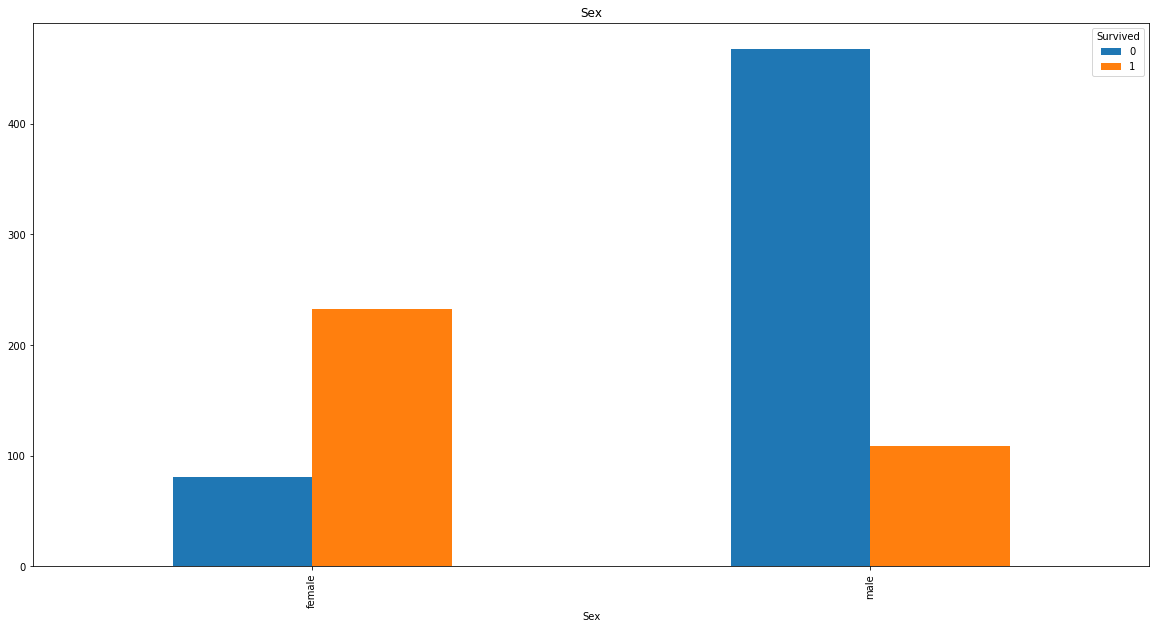

In [14]:
sex_df = titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.title('Sex')
plt.show()




### 수치형 변수의 분포 살펴보기
#### 단변수 탐색

In [17]:
numerical_feature = list(set(titanic.columns) - set(category_feature) - set(['PassengerId','Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature




array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

/Users/kih/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


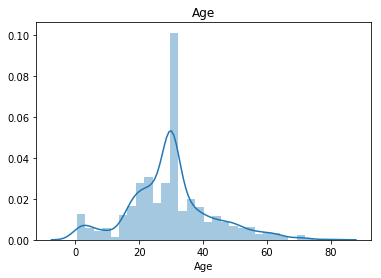

/Users/kih/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


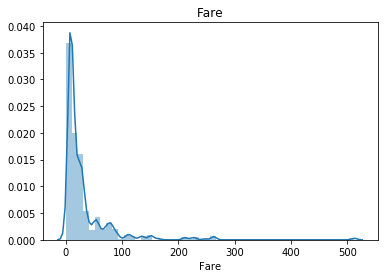

/Users/kih/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


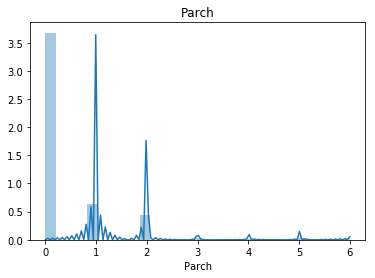

/Users/kih/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


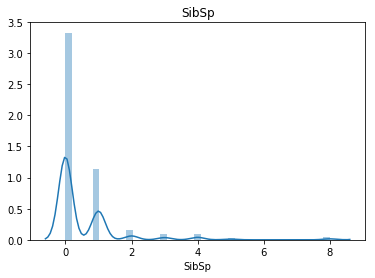

In [18]:
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    plt.show()




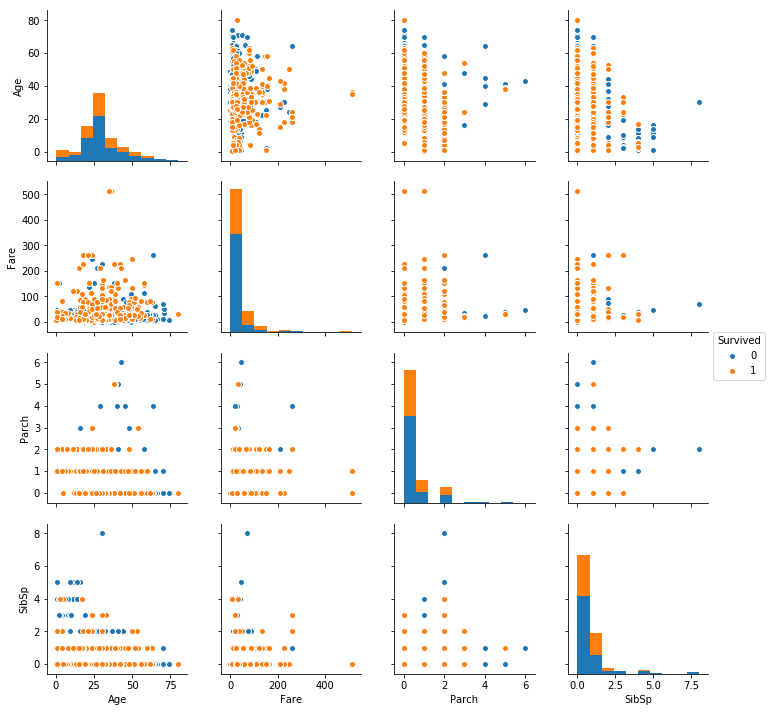

In [19]:
sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue='Survived', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()




#### 수치형, 명목형 변수 간의 관계 탐색

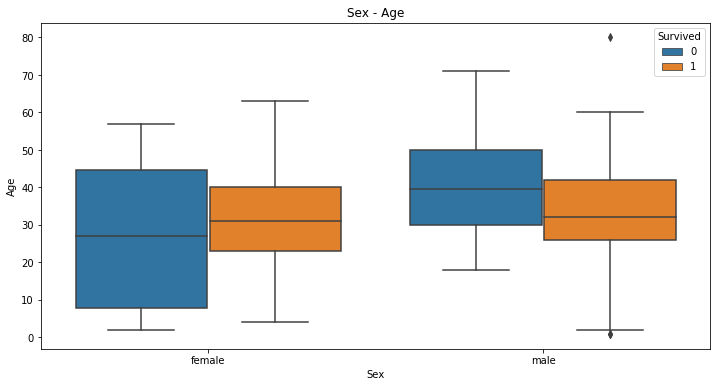

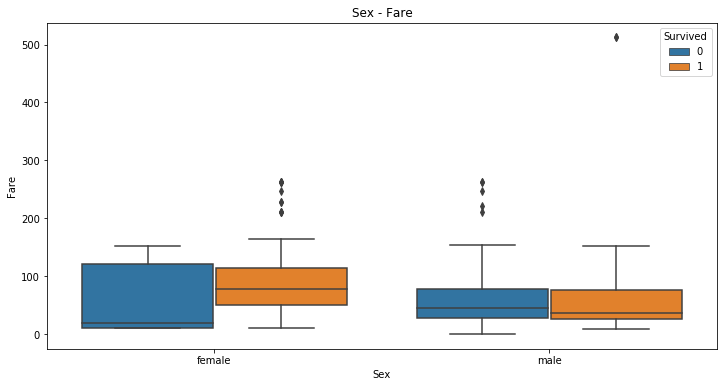

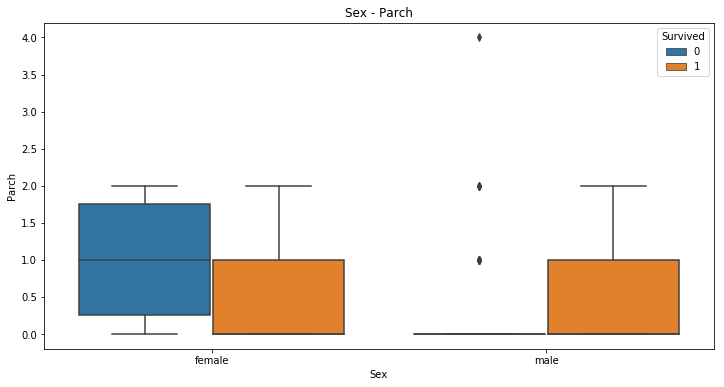

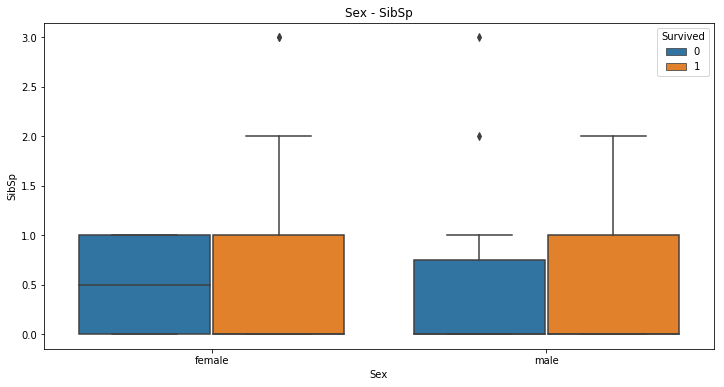

In [20]:
unique_list = titanic['Sex'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Sex', y=col, hue='Survived', data=titanic.dropna())
    plt.title("Sex - {}".format(col))
    plt.show()


